# Versuch 233: Fourieroptik

In [3]:
import matplotlib
import numpy as np
import pandas as pd 
from pandas import DataFrame as df
import matplotlib.pyplot as plt

from helper import *

%matplotlib inline

## Teil 0: Eichung der Abszisse

In [39]:
eichdata = np.genfromtxt("data/eichung.dat",skip_header=1)
deichung = eichdata[:-1]-eichdata[1:]
eichwerte = deichung.T[2]/deichung.T[1]
eichwert = np.mean(eichwerte)
deichwert = np.sqrt(np.sum((eichwert-eichwerte)**2)/6)
printResult("m_{eich}",abs(eichwert),error=deichwert,unit='\mu m/px')

<IPython.core.display.Math object>

## Teil 1: Einzelspalt 

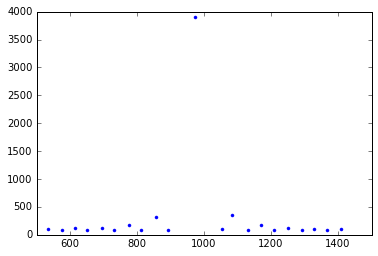

In [91]:
data = np.genfromtxt('data/einzelspaltminmax.dat',skip_header=1)
maxdata = data[:11]
mindata = data[11:]

ddist = np.sqrt(2)*data[0,5]
plt.plot(data[:,2], data[:,3], marker='.',linestyle='none')
plt.show()

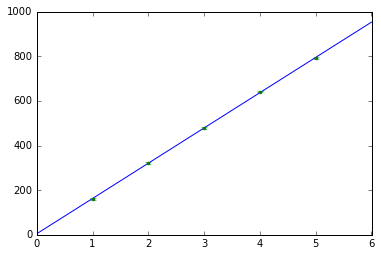

In [122]:
distmin = mindata[:5]-mindata[5:]
distmax = maxdata[1:6]-maxdata[6:]

curve, popt, pcov = fit_lin(distmin[:,1]/2,distmin[:,2])

#plt.errorbar(distmax[:,1]/2,distmax[:,2],yerr=ddist,marker='.',linestyle='none')
x = np.linspace(0,6,7)
plt.plot(x, popt[0]*x+popt[1])
plt.show()

In [123]:
m, c = popt

printResult('c',c,error=np.sqrt(pcov[1,1]),unit='px')
printResult('m',m,error=np.sqrt(pcov[0,0]),unit='px')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

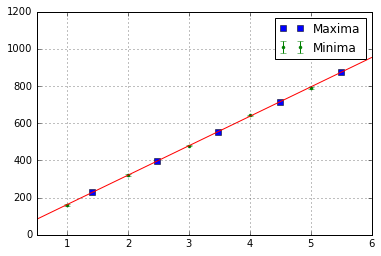

In [135]:
n = (distmax[:,2]-c)/m
plt.errorbar(n,distmax[:,2],linestyle='none',marker='s', label='Maxima')
plt.errorbar(distmin[:,1]/2, distmin[:,2], yerr=ddist, marker=".", linestyle='none',label='Minima')
plt.plot(x, popt[0]*x+popt[1])
plt.xlim([.5,6])
plt.ylim([0,1200])
plt.grid()
plt.legend()
plt.show()